In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import sys
sys.path.append('../../0_python_modules/')
import extras 
import msm_analysis as ana
import idp_analysis as idp

In [12]:
n_clus = np.array([20, 30, 50, 70, 100, 150, 250, 350, 500, 700, 1000, 1500])
msm_lags = np.arange(5,70+1,5)
n_pcca = np.array([2, 3, 4, 5, 6])
arcs = [2,3,4,6]

In [3]:
def get_msm_labels(diff, nc, ml, npc):
    out = []
    for i in range(len(nc)):
        for j in range(len(ml)):
            for k in range(len(npc)):
                out.append([ nc[i], ml[j], npc[k], diff[i,j,k] ])
    return np.array(out)

In [4]:
direct_cmean_strict = np.load('direct/saved_cdiffs/cmean_strict.npy')

In [5]:
supervised_cmean_strict = np.load('supervised/saved_fdiffs/cmean_strict.npy')

In [6]:
urf_cmean_strict = np.load('urf/saved_fdiffs/cmean_strict.npy')

In [7]:
vampnet_cmean_strict = np.load('files_from_vampnets_asyn/cmean_strict.npy')

/tmp/ipykernel_181408/505564078.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c1 = mt.cm.get_cmap('Blues_r')
/tmp/ipykernel_181408/505564078.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c2 = mt.cm.get_cmap('Reds')


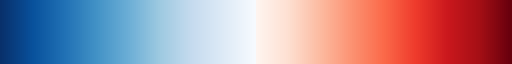

In [8]:
c1 = mt.cm.get_cmap('Blues_r')
c2 = mt.cm.get_cmap('Reds')
n=256
cmap = mt.colors.LinearSegmentedColormap.from_list('', 
                                                  [c1(i/n) for i in range(n)]+[c2(i/n) for i in range(n)])
cmap

In [9]:
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=7
plt.rcParams['ytick.major.width']=2

In [14]:
n1, n2 = 200, 9180
diff = np.mean(urf_cmean_strict/n1, axis=0) - direct_cmean_strict/n2
diff = get_msm_labels(diff, n_clus, msm_lags, n_pcca)

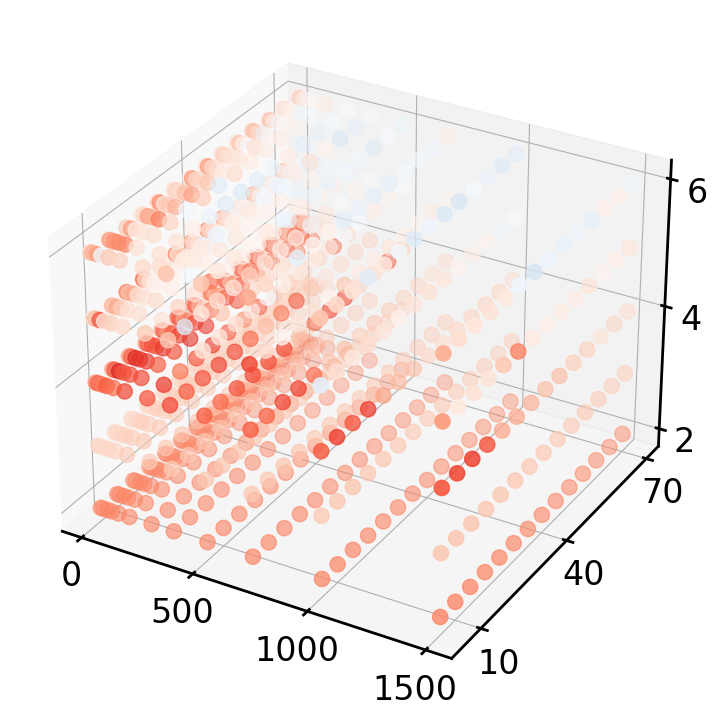

In [11]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff[:,0], diff[:,1], diff[:,2], 
           marker='o', s=120,
          c=diff[:,3], cmap=cmap, vmin=-0.2, vmax=0.2)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,40,70])
ax.set_zticks([2,4,6])
plt.savefig('plots/fdiff_urf_direct.pdf')
plt.show()

In [12]:
n1, n2 = 200, 9180
diff = np.mean(urf_cmean_strict/n1, axis=0) - np.mean(supervised_cmean_strict/n1, axis=0)
diff = get_msm_labels(diff, n_clus, msm_lags, n_pcca)

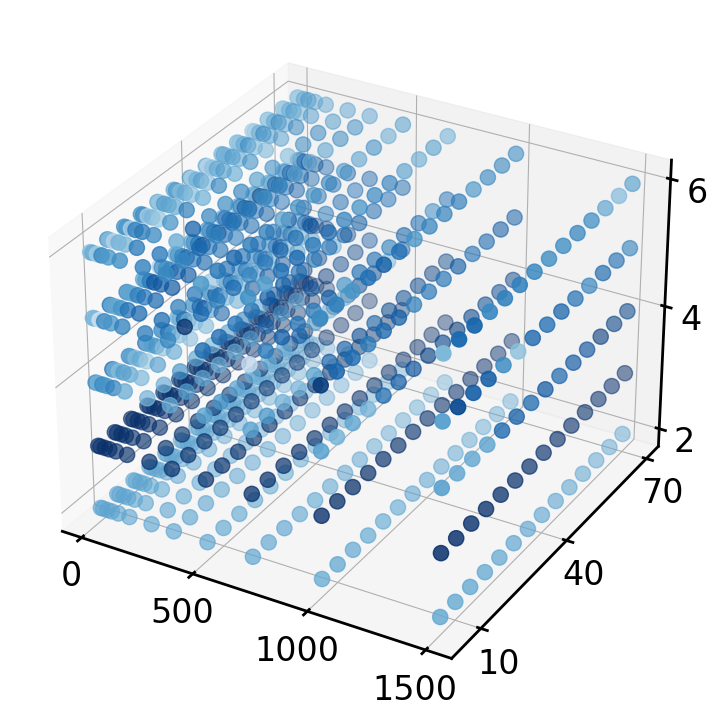

In [13]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff[:,0], diff[:,1], diff[:,2], 
           marker='o', s=120,
          c=diff[:,3], cmap=cmap, vmin=-0.2, vmax=0.2)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,40,70])
ax.set_zticks([2,4,6])
plt.savefig('plots/fdiff_urf_supervised.pdf')
plt.show()

In [40]:
data = [
    get_msm_labels(direct_cmean_strict/n2, n_clus, msm_lags, n_pcca)[:,3], 
    get_msm_labels(np.mean(supervised_cmean_strict/n1, axis=0), n_clus, msm_lags, n_pcca)[:,3], 
    get_msm_labels(np.mean(urf_cmean_strict/n1, axis=0), n_clus, msm_lags, n_pcca)[:,3],
    get_msm_labels(np.mean(vampnet_cmean_strict/n2, axis=0), arcs, msm_lags, n_pcca)[:,3]
]
colors = ['teal', 'dodgerblue', 'crimson', 'grey']

In [41]:
means = np.array([np.mean(d) for d in data])
means

array([0.12158111, 0.31316905, 0.16753321, 0.08340675])

In [42]:
extremes = np.array([np.min(d) for d in data]), np.array([np.max(d) for d in data])
extremes

(array([0.06535948, 0.254     , 0.10833333, 0.0224183 ]),
 array([0.23511256, 0.377     , 0.30173333, 0.16544517]))

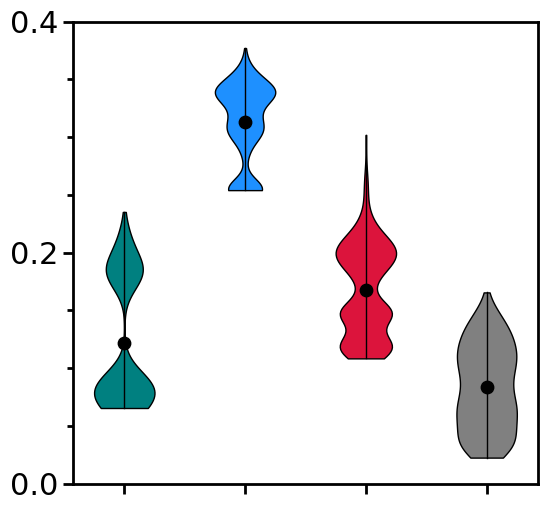

In [46]:
fig,ax=plt.subplots(1,figsize=(6,6))

for i in range(len(data)):
    parts=ax.violinplot([data[i]], positions=[i], showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    ax.plot([i,i], [extremes[0][i], extremes[1][i]], lw=1, color='black')
    ax.scatter([i], [means[i]], c='black', s=80)

ax.spines[:].set_linewidth(2)
ax.set_ylim(0.0,0.4)
ax.set_yticks([0,0.2,0.4])
ax.set_xticks([0,1,2,3])
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(labelsize=22, length=7, width=2, labelbottom=False)
ax.tick_params(which='minor', length=4, width=2)
#
plt.savefig('plots/fdiff_all.pdf')
plt.show()

## dbi

In [47]:
ddirect = np.load('direct/saved_dbi/dbi.npy')

In [48]:
dsupervised = np.mean( np.load('supervised/saved_dbi/dbi.npy'), axis=0)

In [49]:
durf = np.mean( np.load('urf/saved_dbi/dbi.npy'), axis=0)

In [50]:
dvampnet = np.mean(np.load('files_from_vampnets_asyn/dbis.npy'), axis=0)

In [51]:
ddirect = np.concatenate((np.concatenate((ddirect))))
dsupervised = np.concatenate((np.concatenate((dsupervised))))
durf = np.concatenate((np.concatenate((durf))))
dvampnet = np.concatenate((np.concatenate((dvampnet))))

In [52]:
data = [ddirect, dsupervised, durf, dvampnet]

In [53]:
means = np.array([np.mean(d) for d in data])
means

array([2.98510957, 2.42588888, 2.40499851, 3.24545714])

In [54]:
extremes = np.array([np.min(d) for d in data]), np.array([np.max(d) for d in data])
extremes

(array([2.71319337, 1.86015056, 1.98232942, 2.90351802]),
 array([3.6687208 , 3.1411846 , 3.12041741, 3.70880288]))

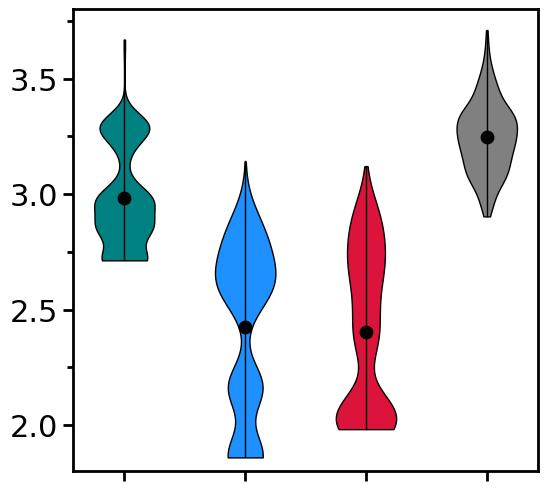

In [55]:
fig,ax=plt.subplots(1,figsize=(6,6))

for i in range(len(data)):
    parts=ax.violinplot([data[i]], positions=[i], showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    ax.plot([i,i], [extremes[0][i], extremes[1][i]], lw=1, color='black')
    ax.scatter([i], [means[i]], c='black', s=80)

ax.spines[:].set_linewidth(2)
ax.set_ylim(1.8,3.8)
ax.set_yticks([2.,2.5,3,3.5])
ax.set_xticks([0,1,2,3])
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(labelsize=22, length=7, width=2, labelbottom=False)
ax.tick_params(which='minor', length=4, width=2)
#
plt.savefig('plots/dbi_all.pdf')
plt.show()

In [32]:
diff = get_msm_labels( durf-ddirect , n_clus, msm_lags, n_pcca)

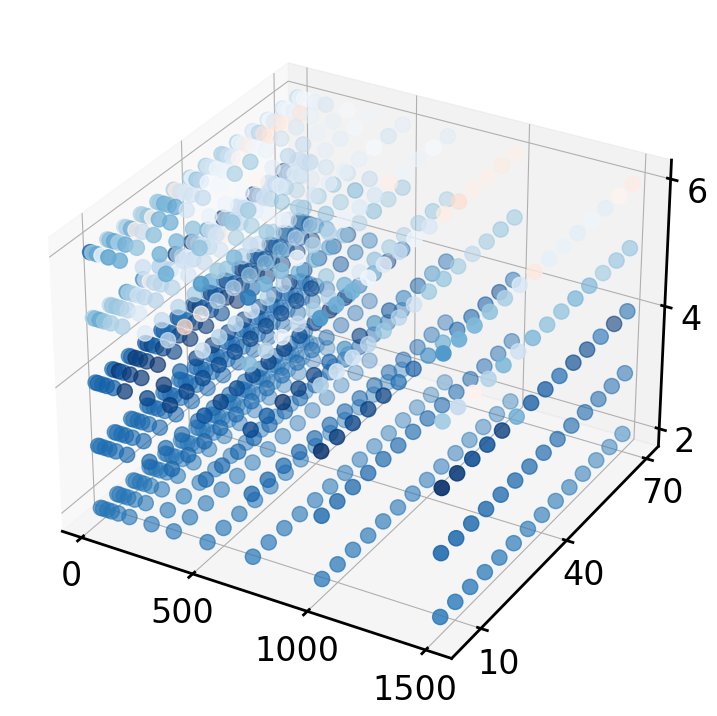

In [29]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff[:,0], diff[:,1], diff[:,2], 
           marker='o', s=120,
          c=diff[:,3], cmap=cmap, vmin=-1, vmax=1)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,40,70])
ax.set_zticks([2,4,6])
plt.savefig('plots/dbi_urf_direct.pdf')
plt.show()

In [30]:
diff = get_msm_labels( durf-dsupervised , n_clus, msm_lags, n_pcca)

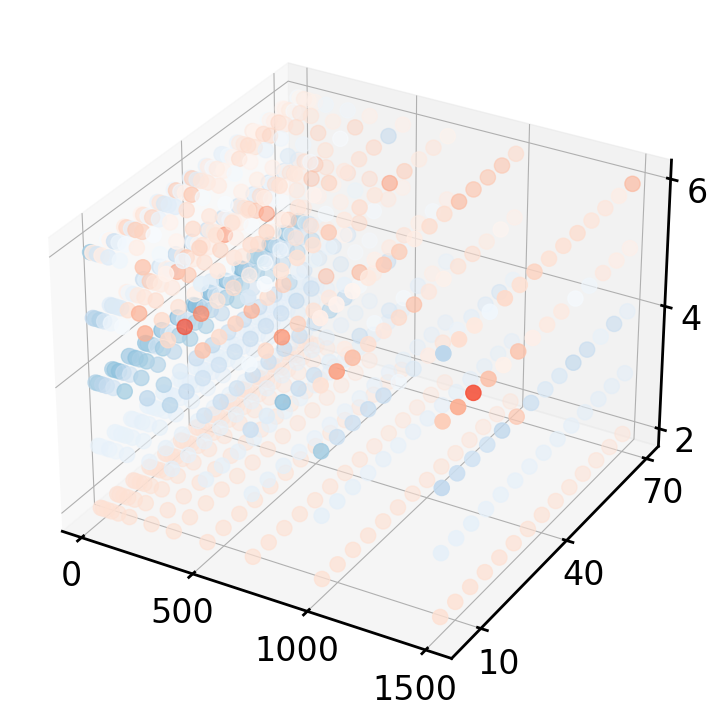

In [31]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(diff[:,0], diff[:,1], diff[:,2], 
           marker='o', s=120,
          c=diff[:,3], cmap=cmap, vmin=-1, vmax=1)
ax.tick_params(labelsize=24, length=10, width=2)
ax.set_xticks([0,500,1000,1500])
ax.set_yticks([10,40,70])
ax.set_zticks([2,4,6])
plt.savefig('plots/dbi_urf_supervised.pdf')
plt.show()

In [9]:
aa = np.random.normal(0,1,10)
aa

array([-0.47416618, -0.00179827, -1.26194182, -0.64089218, -1.3343279 ,
        0.85929583,  1.02713979, -0.83052739,  0.72852576, -0.37415603])

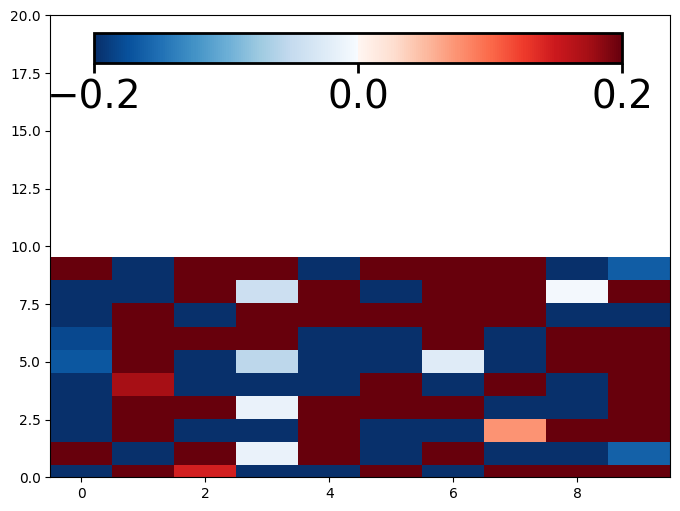

In [40]:
fig,ax=plt.subplots(1,figsize=(8,6))
pl=ax.imshow(np.random.normal(0,1,(10,10)), cmap=cmap, vmin=-0.2, vmax=0.2, aspect='auto')
ax.set_ylim(0,20)
cax=fig.add_axes([0.18,0.8,0.66,0.05])
cb=plt.colorbar(pl, cax=cax, orientation='horizontal')
cb.ax.spines[:].set_linewidth(2)
cb.ax.set_xticks([-0.2,0,0.2])
cb.ax.tick_params(labelsize=28, length=7, width=2)
plt.savefig('plots/cbar_fdiff.pdf')
plt.show()